HOTEL PRICE FLUCTUATIONS
---
How do hotel prices fluctuate over time in different regions?

In [18]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [19]:
#File to load
hotel_bookings_file = Path("Resources/hotel_bookings_dataset.csv")
tourism_file = Path("Resources/tourism_dataset.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)
tourism_data = pd.read_csv(tourism_file)


Data cleaning 
---

In [20]:
# Remove specified columns from the DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [21]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Display the updated hotel_data DataFrame
hotel_data


,hotel,arrival_date_year,arrival_date_month,country,adr,total_stays_days
0,Resort Hotel,2015,July,PRT,0.00,0
1,Resort Hotel,2015,July,PRT,0.00,0
2,Resort Hotel,2015,July,GBR,75.00,1
3,Resort Hotel,2015,July,GBR,75.00,1
4,Resort Hotel,2015,July,GBR,98.00,2
...,...,...,...,...,...,...
119385,City Hotel,2017,August,BEL,96.14,7
119386,City Hotel,2017,August,FRA,225.43,7
119387,City Hotel,2017,August,DEU,157.71,7
119388,City Hotel,2017,August,GBR,104.40,7


In [22]:
# Rearrange the hotel_data columns
columns_order = [
    'country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename hotel_data columns
hotel_data = hotel_data.rename(columns={
    'country':'Country',
    'adr': 'Average daily rate',
    'hotel': 'Hotel type',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'total_stays_days': 'Total Days of Stays'
})

hotel_data

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


In [23]:
#convert abbreviation to country name in the hotel_data dataframe
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_data['Country'] = hotel_data['Country'].replace(country_mapping)

In [24]:
#combine the data into single dataframe
hotel_tourism_df = pd.merge(hotel_data, tourism_data, how="left", on="Country")

#display data
hotel_tourism_df

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type,Location,Category,Visitors,Rating,Revenue,Accommodation_Available
0,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
1,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,98.00,2015,July,2,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13252697,France,225.43,2017,August,7,City Hotel,IfKotyaJFC,Nature,276317.0,3.53,325183.96,Yes
13252698,France,225.43,2017,August,7,City Hotel,gHXUrdticm,Cultural,40939.0,4.65,957026.85,Yes
13252699,Germany,157.71,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN
13252700,United Kingdom,104.40,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Remove specified columns from the DataFrame
hotel_tourism_df_clean = ['Location', 'Category', 'Accommodation_Available', 'Visitors', 'Rating', 'Revenue']

hotel_tourism_df = hotel_tourism_df.drop(columns=hotel_tourism_df_clean)
hotel_tourism_df.head()

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,Portugal,0.0,2015,July,0,Resort Hotel
1,Portugal,0.0,2015,July,0,Resort Hotel
2,United Kingdom,75.0,2015,July,1,Resort Hotel
3,United Kingdom,75.0,2015,July,1,Resort Hotel
4,United Kingdom,98.0,2015,July,2,Resort Hotel


Statistical analysis
---

In [43]:
hotel_tourism_df.describe()

,Average daily rate,Arrival Year,Total Days of Stays
count,1.325270e+07,1.325270e+07,1.325270e+07
mean,1.099757e+02,2.016291e+03,3.472454e+00
std,4.377348e+01,6.557942e-01,2.303766e+00
min,-6.380000e+00,2.015000e+03,0.000000e+00
25%,7.920000e+01,2.016000e+03,2.000000e+00
50%,1.028500e+02,2.016000e+03,3.000000e+00
75%,1.330000e+02,2.017000e+03,4.000000e+00
max,5.400000e+03,2.017000e+03,6.900000e+01


Maximum values on Average Daily Rate:
---
1. Arrival Month versus Average Daily Rate
2. Hotel Type + Arrival Month V.S. Average Daily Rate
3. Top 5 countries by Seasons 

In [42]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_month' to a categorical type with the specified order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group data by 'arrival_date_month' and calculate the average daily rate
average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].max().reset_index()

# Rename the columns for clarity
average_rate_by_month.columns = ['Arrival Month', 'Average daily rate']


# Display the resulting DataFrame
average_rate_by_month


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/1797313477.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].max().reset_index()


,Arrival Month,Average daily rate
0,January,284.20
1,February,284.20
2,March,5400.00
3,April,336.00
4,May,510.00
5,June,333.67
6,July,508.00
7,August,450.00
8,September,345.00
9,October,300.00


In [57]:
# Ensure 'Arrival Month' is already categorized in the desired order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group by hotel type and arrival month, then calculate the average daily rate
average_rate_by_hotel_month = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].max().reset_index()

# Rename columns for clarity
average_rate_by_hotel_month.columns = ['Hotel Type', 'Arrival Month', 'Average Daily Rate']

# Display the resulting DataFrame
print(average_rate_by_hotel_month)

      Hotel Type Arrival Month  Average Daily Rate
0     City Hotel       January              284.20
1     City Hotel      February              284.20
2     City Hotel         March             5400.00
3     City Hotel         April              336.00
4     City Hotel           May              510.00
5     City Hotel          June              333.67
6     City Hotel          July              365.00
7     City Hotel        August              372.33
8     City Hotel     September              345.00
9     City Hotel       October              300.00
10    City Hotel      November              260.00
11    City Hotel      December              451.50
12  Resort Hotel       January              149.00
13  Resort Hotel      February              174.00
14  Resort Hotel         March              193.71
15  Resort Hotel         April              270.00
16  Resort Hotel           May              225.50
17  Resort Hotel          June              318.82
18  Resort Hotel          July 

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/464388063.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_hotel_month = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].max().reset_index()


In [47]:
# Define the order of the months and map them to seasons
month_to_season = {
    "January": "Winter", "February": "Spring", "March": "Spring",
    "April": "Spring", "May": "Summer", "June": "Summer",
    "July": "Summer", "August": "Summer", "September": "Fall",
    "October": "Fall", "November": "Winter", "December": "Winter"
}

# Add a 'Season' column to the DataFrame
hotel_tourism_df['Season'] = hotel_tourism_df['Arrival Month'].map(month_to_season)

# Group by Country to calculate the overall average ADR
overall_avg_adr_by_country = hotel_tourism_df.groupby('Country')['Average daily rate'].max().reset_index()

# Sort and select the top 5 countries by overall ADR
top_5_countries = overall_avg_adr_by_country.sort_values(by='Average daily rate', ascending=False).head(5)['Country']

# Filter the original DataFrame to include only the top 5 countries
filtered_data = hotel_tourism_df[hotel_tourism_df['Country'].isin(top_5_countries)]

# Group by Season and Country, then calculate the average ADR for the filtered data
avg_adr_by_season_and_country = filtered_data.groupby(['Season', 'Country'])['Average daily rate'].max().reset_index()
avg_adr_by_season_and_country

,Season,Country,Average daily rate
0,Fall,Italy,243.90
1,Fall,Morocco,207.90
2,Fall,Portugal,345.00
3,Fall,Spain,259.00
4,Fall,United Kingdom,300.00
5,Spring,Italy,260.00
6,Spring,Morocco,242.33
7,Spring,Portugal,5400.00
8,Spring,Spain,336.00
9,Spring,United Kingdom,312.50


Mean values on Average Daily Rate:
---
1. Arrival Month versus Average Daily Rate
2. Hotel Type + Arrival Month V.S. Average Daily Rate
3. Top 5 countries by Seasons 

In [50]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_month' to a categorical type with the specified order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group data by 'arrival_date_month' and calculate the average daily rate
average_rate_by_month_mean = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()

# Rename the columns for clarity
average_rate_by_month_mean.columns = ['Arrival Month', 'Average daily rate']


# Display the resulting DataFrame
average_rate_by_month_mean


/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/1922902904.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month_mean = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()


,Arrival Month,Average daily rate
0,January,70.361241
1,February,73.582276
2,March,80.679646
3,April,100.380790
4,May,108.695516
5,June,116.672192
6,July,126.788013
7,August,140.111523
8,September,105.049657
9,October,87.908879


In [52]:
# Ensure 'Arrival Month' is already categorized in the desired order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group by hotel type and arrival month, then calculate the average daily rate
average_rate_by_hotel_month_mean = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()

# Rename columns for clarity
average_rate_by_hotel_month_mean.columns = ['Hotel Type', 'Arrival Month', 'Average Daily Rate']

# Display the resulting DataFrame
print(average_rate_by_hotel_month_mean)

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/1618937966.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_hotel_month_mean = hotel_data.groupby(['Hotel type', 'Arrival Month'])['Average daily rate'].mean().reset_index()


      Hotel Type Arrival Month  Average Daily Rate
0     City Hotel       January           82.628986
1     City Hotel      February           85.088278
2     City Hotel         March           92.643116
3     City Hotel         April          111.251838
4     City Hotel           May          121.638560
5     City Hotel          June          119.074341
6     City Hotel          July          110.734292
7     City Hotel        August          114.680455
8     City Hotel     September          110.004661
9     City Hotel       October           99.974498
10    City Hotel      November           88.069601
11    City Hotel      December           88.826307
12  Resort Hotel       January           49.461883
13  Resort Hotel      February           55.171930
14  Resort Hotel         March           57.520147
15  Resort Hotel         April           77.849496
16  Resort Hotel           May           78.758134
17  Resort Hotel          June          110.444749
18  Resort Hotel          July 

In [63]:
# Define the order of the months and map them to seasons
month_to_season = {
    "January": "Winter", "February": "Spring", "March": "Spring",
    "April": "Spring", "May": "Summer", "June": "Summer",
    "July": "Summer", "August": "Summer", "September": "Fall",
    "October": "Fall", "November": "Winter", "December": "Winter"
}

# Add a 'Season' column to the DataFrame
hotel_tourism_df['Season'] = hotel_tourism_df['Arrival Month'].map(month_to_season)

# Group by Country to calculate the overall average ADR
overall_avg_adr_by_country_mean = hotel_tourism_df.groupby('Country')['Average daily rate'].mean().reset_index()

# Sort and select the top 5 countries by overall ADR
top_5_countries = overall_avg_adr_by_country_mean.sort_values(by='Average daily rate', ascending=False).head(5)['Country']

# Filter the original DataFrame to include only the top 5 countries
filtered_data_mean = hotel_tourism_df[hotel_tourism_df['Country'].isin(top_5_countries)]

# Group by Season and Country, then calculate the average ADR for the filtered data
avg_adr_by_season_and_country_mean = filtered_data.groupby(['Season', 'Country'])['Average daily rate'].mean().reset_index()
avg_adr_by_season_and_country_mean

,Season,Country,Average daily rate
0,Fall,Italy,116.672792
1,Fall,Morocco,121.662632
2,Fall,Portugal,89.666248
3,Fall,Spain,106.076618
4,Fall,United Kingdom,85.832024
5,Spring,Italy,104.388847
6,Spring,Morocco,102.024853
7,Spring,Portugal,76.078386
8,Spring,Spain,95.684941
9,Spring,United Kingdom,78.624242


Data Visualization
---

Maximum values on Average Daily Rate:
---
1. Arrival Month versus Average Daily Rate
2. Hotel Type + Arrival Month V.S. Average Daily Rate
3. Top 5 countries by Seasons 

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/2478318541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


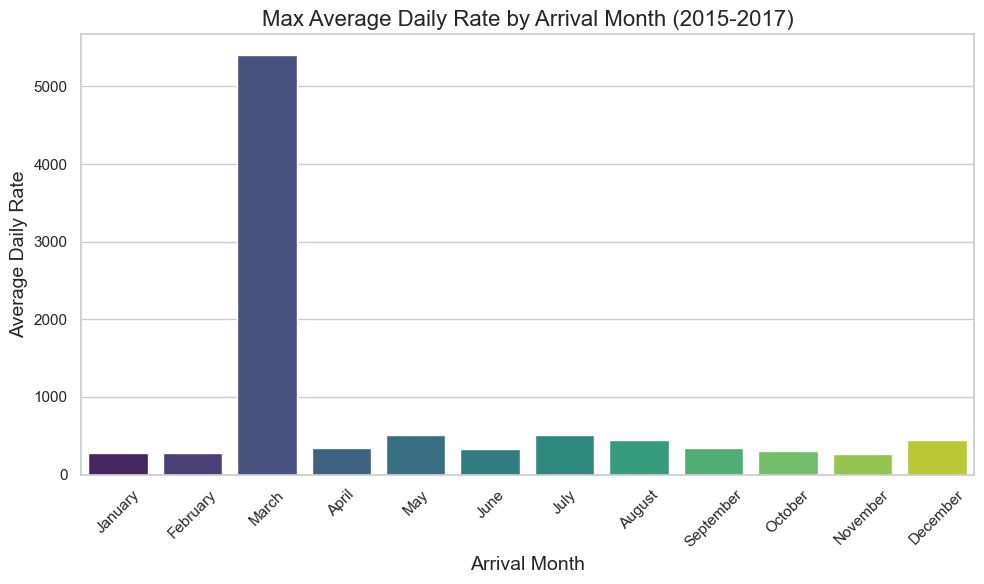

In [59]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average daily rates by arrival month
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=average_rate_by_month,
    x='Arrival Month',
    y='Average daily rate',
    palette='viridis'
)

# Add titles and labels
plt.title('Max Average Daily Rate by Arrival Month (2015-2017)', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


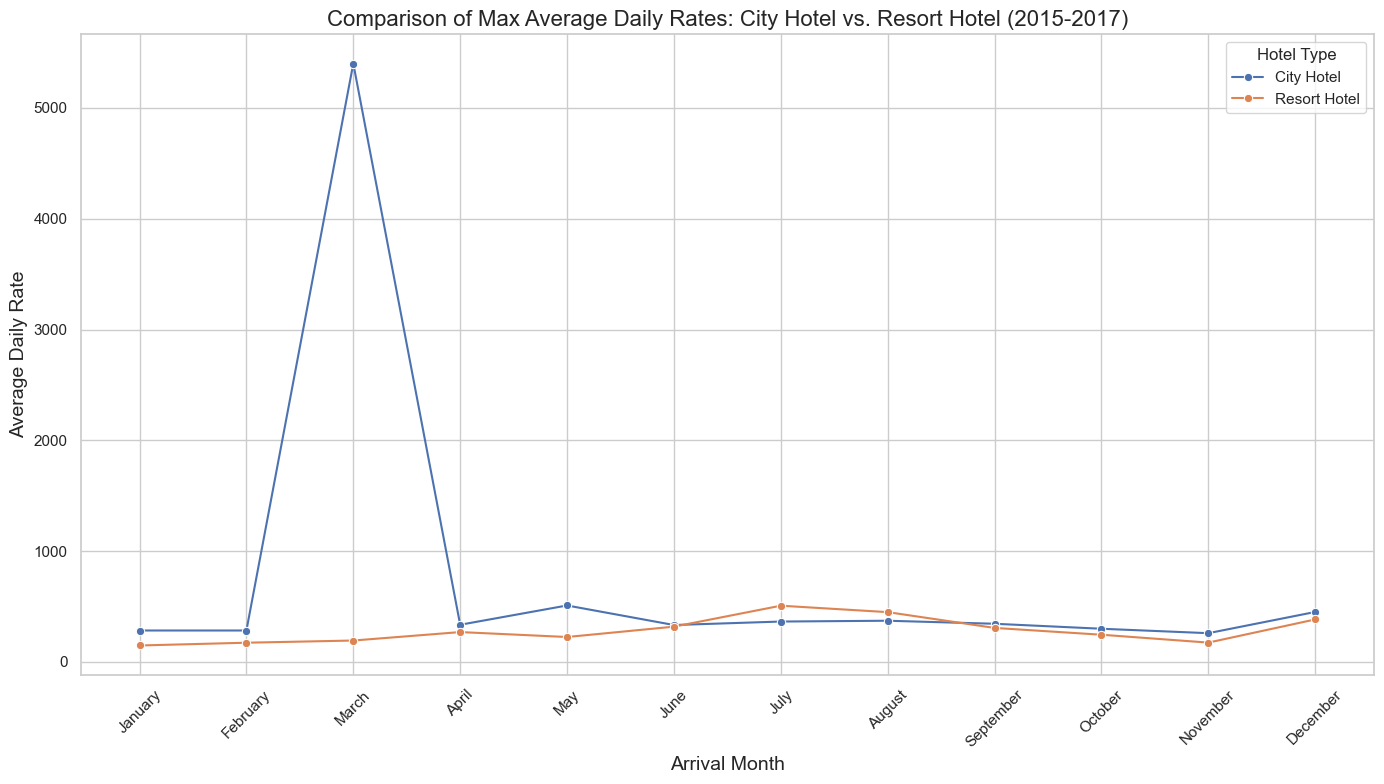

In [60]:
# Filter the data for city hotels and resort hotels
filtered_data = average_rate_by_hotel_month[average_rate_by_hotel_month['Hotel Type'].isin(['City Hotel', 'Resort Hotel'])]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot for average daily rates by hotel type and arrival month
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(
    data=filtered_data,
    x='Arrival Month',
    y='Average Daily Rate',
    hue='Hotel Type',
    marker='o'  # Adds markers to each data point
)

# Add titles and labels
plt.title('Comparison of Max Average Daily Rates: City Hotel vs. Resort Hotel (2015-2017)', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/1422993693.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=avg_adr_by_season_and_country, x='Season', y='Average daily rate', hue='Country', marker='o', ci=None, palette='tab10')


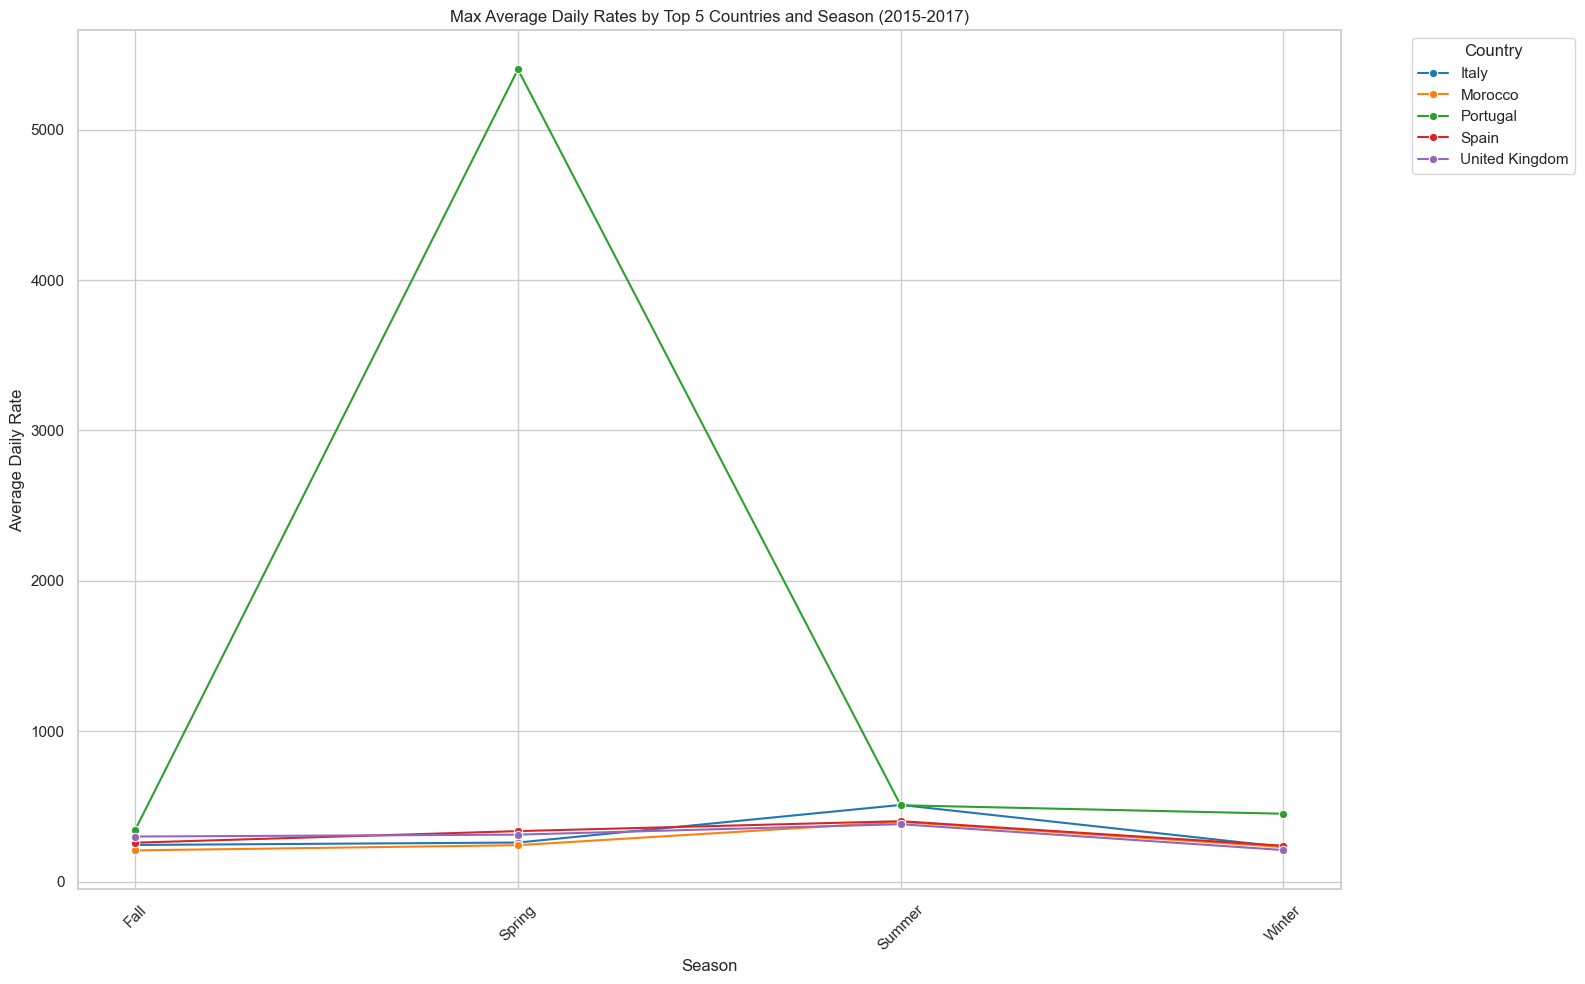

In [61]:
# Define the order of the months and map them to seasons
month_to_season = {
    "January": "Winter", "February": "Spring", "March": "Spring",
    "April": "Spring", "May": "Summer", "June": "Summer",
    "July": "Summer", "August": "Summer", "September": "Fall",
    "October": "Fall", "November": "Winter", "December": "Winter"
}

# Add a 'Season' column to the DataFrame
hotel_tourism_df['Season'] = hotel_tourism_df['Arrival Month'].map(month_to_season)

# Group by Country to calculate the overall average ADR
overall_avg_adr_by_country = hotel_tourism_df.groupby('Country')['Average daily rate'].max().reset_index()

# Sort and select the top 5 countries by overall ADR
top_5_countries = overall_avg_adr_by_country.sort_values(by='Average daily rate', ascending=False).head(5)['Country']

# Filter the original DataFrame to include only the top 5 countries
filtered_data = hotel_tourism_df[hotel_tourism_df['Country'].isin(top_5_countries)]

# Group by Season and Country, then calculate the average ADR for the filtered data
avg_adr_by_season_and_country = filtered_data.groupby(['Season', 'Country'])['Average daily rate'].max().reset_index()

# Plot the results
plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_adr_by_season_and_country, x='Season', y='Average daily rate', hue='Country', marker='o', ci=None, palette='tab10')
plt.title('Max Average Daily Rates by Top 5 Countries and Season (2015-2017)')
plt.xlabel('Season')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Mean values on Average Daily Rate:
---
1. Arrival Month versus Average Daily Rate
2. Hotel Type + Arrival Month V.S. Average Daily Rate
3. Top 5 countries by Seasons 

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/2336062235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


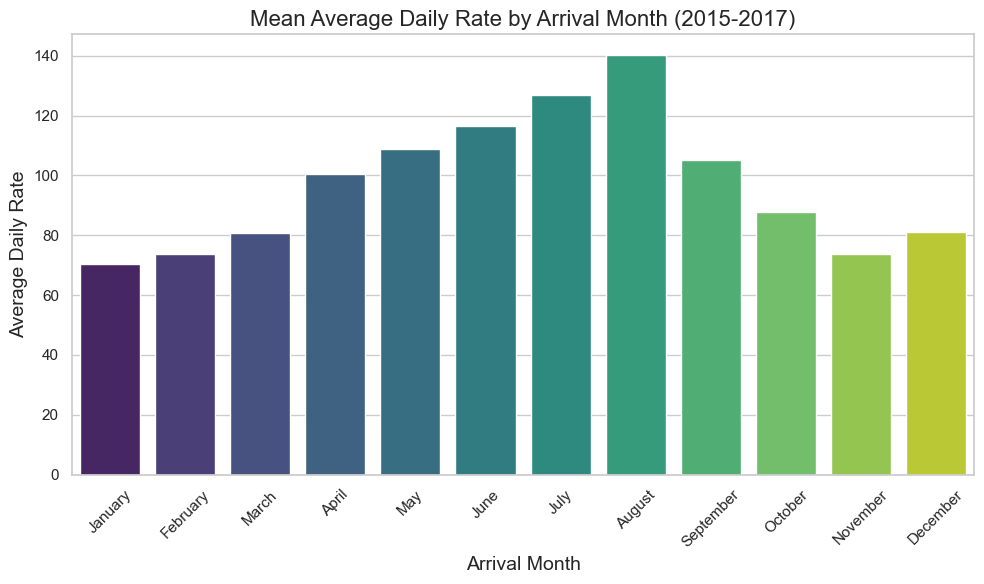

In [62]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average daily rates by arrival month
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=average_rate_by_month_mean,
    x='Arrival Month',
    y='Average daily rate',
    palette='viridis'
)

# Add titles and labels
plt.title('Mean Average Daily Rate by Arrival Month (2015-2017)', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

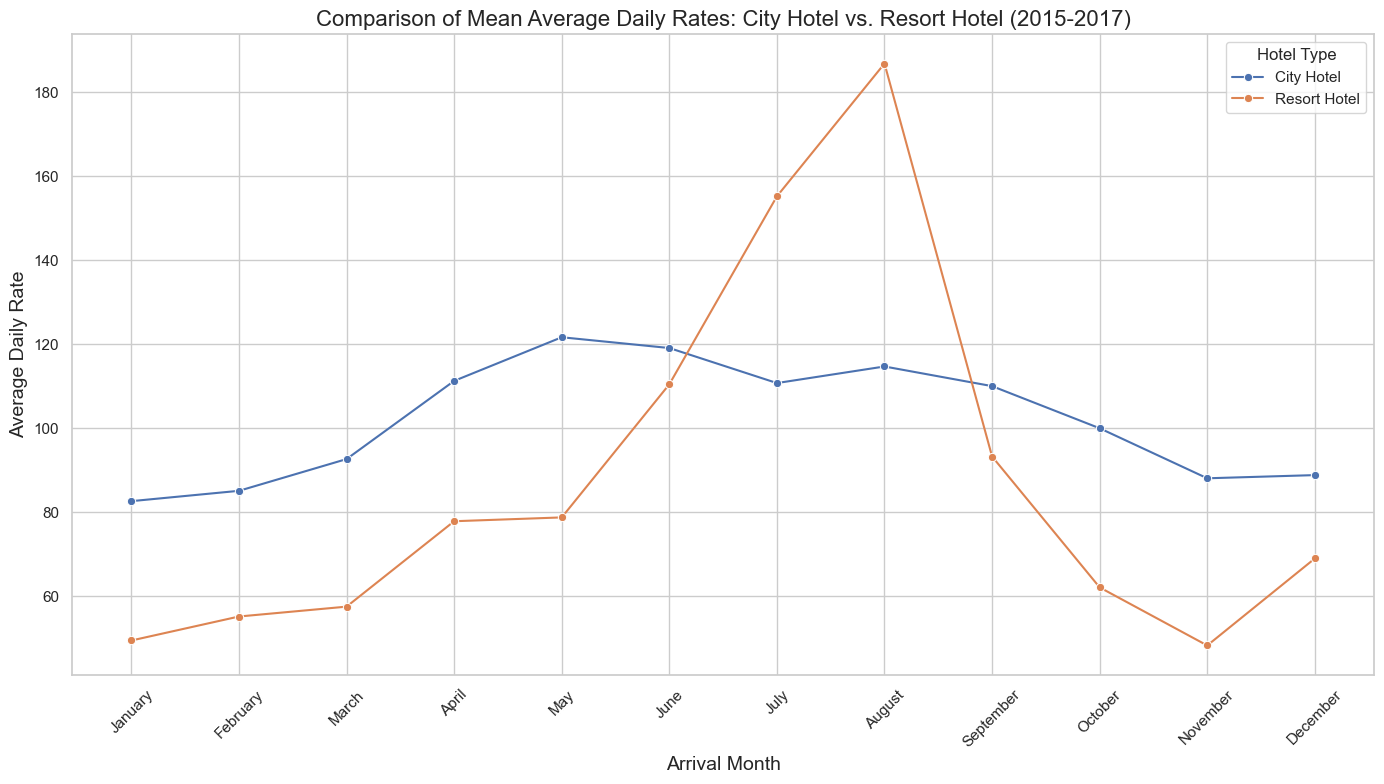

In [64]:
# Filter the data for city hotels and resort hotels
data_mean = average_rate_by_hotel_month_mean[average_rate_by_hotel_month_mean['Hotel Type'].isin(['City Hotel', 'Resort Hotel'])]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot for average daily rates by hotel type and arrival month
plt.figure(figsize=(14, 8))
line_plot = sns.lineplot(
    data=data_mean,
    x='Arrival Month',
    y='Average Daily Rate',
    hue='Hotel Type',
    marker='o'  # Adds markers to each data point
)

# Add titles and labels
plt.title('Comparison of Mean Average Daily Rates: City Hotel vs. Resort Hotel (2015-2017)', fontsize=16)
plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Daily Rate', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Hotel Type')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/3z/9w8jmp553xbf4bc22cm_w0100000gn/T/ipykernel_54472/820647761.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=avg_adr_by_season_and_country_mean, x='Season', y='Average daily rate', hue='Country', marker='o', ci=None, palette='tab10')


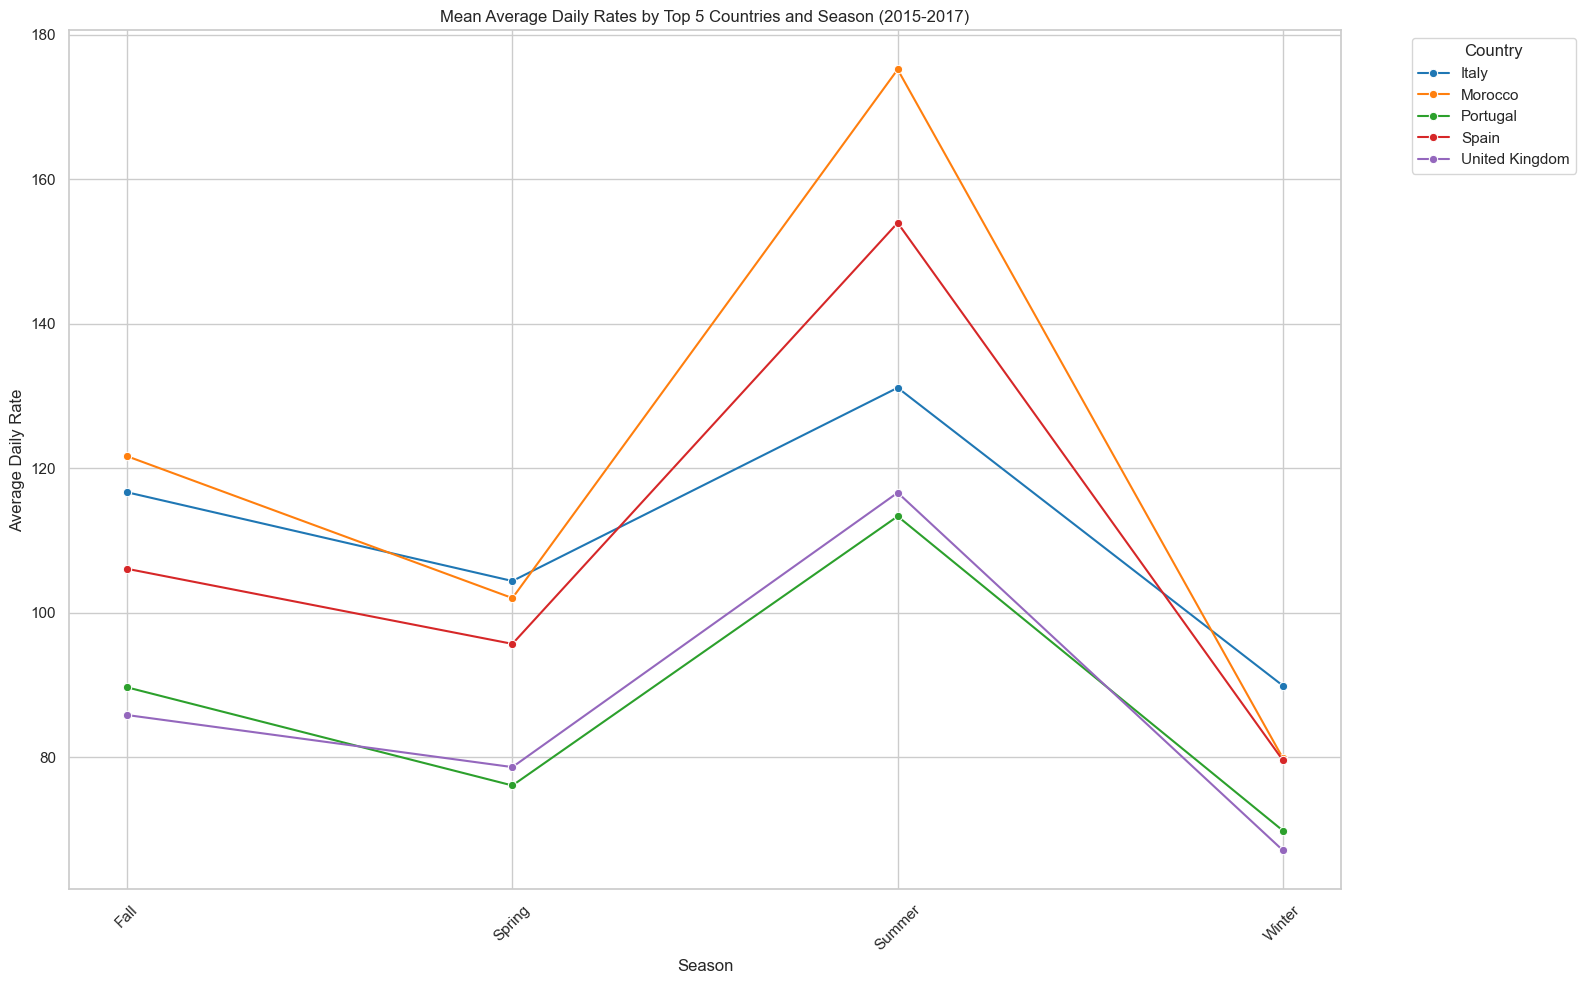

In [65]:
# Plot the results
plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_adr_by_season_and_country_mean, x='Season', y='Average daily rate', hue='Country', marker='o', ci=None, palette='tab10')
plt.title('Mean Average Daily Rates by Top 5 Countries and Season (2015-2017)')
plt.xlabel('Season')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()